In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [363]:
# import data
bio_keep = ['SAMPLE_TIME_UTC','BIOVOLUME_UM3_L']
bio = pd.read_csv('ptHackingBiomass.csv',usecols = bio_keep)
bio.columns = map(str.lower, bio.columns)
bio.rename(columns={'sample_time_utc':'time'},inplace=True)
env_keep = ['TIME','BOT_DEPTH', 'CNDC', 'DENS', 'DOX2', 'PRES_REL', 'PSAL', 'TEMP']
env = pd.read_csv('ptHackingEnvironment.csv',skiprows=29,usecols=env_keep)
env.columns = map(str.lower, env.columns)

In [364]:
# cleaning
# bio
bio = bio[~bio.isnull().any(axis=1)].reset_index(drop=True)
bio.loc[:,'time'] = pd.to_datetime(bio.time).dt.date
bio.sort_values(by='time',inplace=True)
# env
env = env[~env.isnull().any(axis=1)].reset_index(drop=True)
env.loc[:,'time'] = pd.to_datetime(env.time).dt.date
env.sort_values(by='time',inplace=True)

In [367]:
# get same date range
bio_days = bio.groupby('time').size().index.to_list()
env_days = env.groupby('time').size().index.to_list()
env_idx = env.time.isin(bio_days)
bio_idx = bio.time.isin(env_days)
env = env[env_idx]
bio = bio[bio_idx]
# create day counts dataframe
date_counts = pd.DataFrame({'bio':bio.time.value_counts().sort_index(),'env':env.time.value_counts().sort_index()})

In [324]:
min_counts = date_counts.min(axis=1)
# new env dataframe
new_env = pd.DataFrame(columns=env.columns)
for idx, df in env.groupby('time'):
    new_env = new_env.append(df.iloc[:min_counts[idx],:],ignore_index=True)
# new bio dataframe
new_bio = pd.DataFrame(columns=bio.columns)
for idx, df in bio.groupby('time'):
    new_bio = new_bio.append(df.iloc[:min_counts[idx],:],ignore_index=True)

In [ ]:
pd.to_datetime(env.juld, unit='s', origin='unix').astype(int) / (10**9)

In [372]:
# date conversions
new_bio['time_float'] = pd.to_datetime(pd.to_datetime(new_bio.time),unit='s',origin='unix').astype(int) / (10**9)
new_env['time_float'] = pd.to_datetime(pd.to_datetime(new_env.time),unit='s',origin='unix').astype(int) / (10**9)

## EDA

In [376]:
X = new_env.drop('time',axis=1)
y = new_bio.biovolume_um3_l
X['biovolume_um3_l'] = y

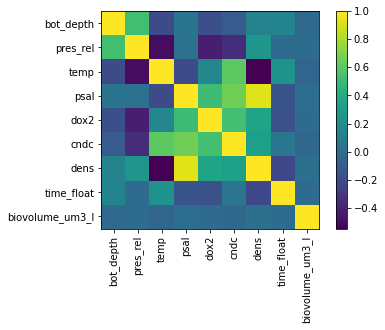

In [377]:
plt.imshow(X.corr())
plt.colorbar()
plt.xticks(ticks = np.arange(X.shape[1]),labels=X.columns.tolist(),rotation=90)
plt.yticks(ticks=np.arange(X.shape[1]),labels=X.columns.tolist())
plt.show()

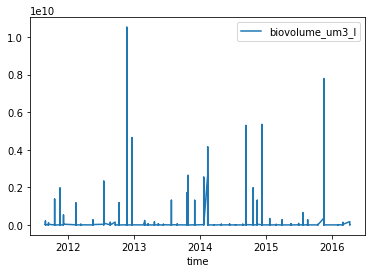

In [318]:
new_bio.plot('time','biovolume_um3_l')

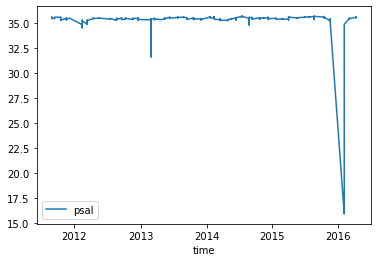

In [301]:
new_env.plot('time','psal')
# one day in 2016 that has low psal values, possible data collection error

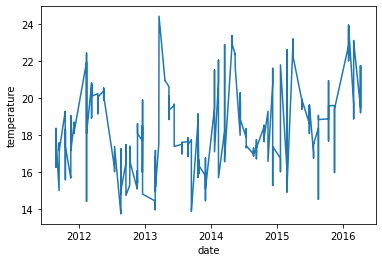

In [308]:
new_env.plot('time','temp',legend=False,ylabel='temperature',xlabel='date')